# Plot distributions with best fit points 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from exp_analysis import *
from fourvec import *

In [3]:
m4_model = {
    "L1": 0.42,
    "L2": 0.1,
    "H1": 0.12,
}

mzprime_model = {
    "L1": 0.03,
    "L2": 0.03,
    "H1": 1.25,
}

ctau_model = {
    "L1": [0.1, 1, 10, 100, 1000],
    "L2": [0.1, 1, 10, 100, 1000],
    "H1": [0.1, 2, 10, 100, 1000],
}

!mkdir -p ../../fig/best_points/bp_l1/
!mkdir -p ../../fig/best_points/bp_l2/
!mkdir -p ../../fig/best_points/bp_h1/

save_folder_model = {
    "L1": "../../fig/best_points/bp_l1/",
    "L2": "../../fig/best_points/bp_l2/",
    "H1": "../../fig/best_points/bp_h1/",
}

In [4]:
model = "H1"

In [6]:
m4 = m4_model[model]
mzprime = mzprime_model[model]
ctaus = ctau_model[model]
save_folder = save_folder_model[model]
df = pd.read_pickle(f'../data/nd280_nu/3plus1/m4_{m4}_mzprime_{mzprime}/MC_m4_{m4}_mzprime_{mzprime}.pckl')
initialise_df(df, ctaus)

Text(0.5, 1.0, 'Best fit point H1')

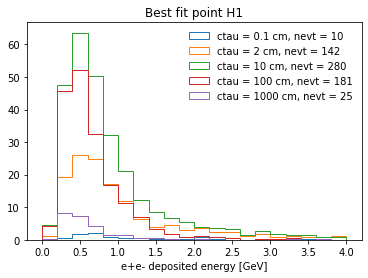

In [7]:
for ctau in ctaus:
    total_selection = df[f'total_selected_{ctau}', '']
    out = plt.hist(df['pee', 't'][total_selection], 
                   bins=20, 
                   range=(0, 4),
                   weights=df['actual_weight', ''][total_selection], 
                   label=f"ctau = {ctau} cm, nevt = {df['actual_weight', ''][total_selection].sum():.0f}", 
                   histtype='step')

plt.legend(frameon=False)
plt.xlabel('e+e- deposited energy [GeV]')
plt.title(f"Best fit point {model}")
# plt.savefig(save_folder+"ee_energy.png", dpi=250)